<h5>Ley de Hooke<h5/>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [58]:
datos_1 = pd.read_csv('resorte_1.csv', delimiter=';')
datos_2 = pd.read_csv('resorte_2.csv', delimiter=';')

In [59]:
#Longitud de los resortes
l_r1 = datos_2['L_R1']
l_r2 = datos_2['L_R2']
#Error instrumental
sigma_1 = datos_2['sigma_r']
sigma_2 = datos_2['sigma_b']
#Masas
m = np.array(datos_1['masa'])
#Longitud resorte 1 con masas
l_r1_m = np.array(datos_1['R_1'])
#longitud resorte 2 con masas
l_r2_m = np.array(datos_1['R_2'])
#longitud resorte 1 y 2 con masas 1 (r1 junto a r2)
l_r1_r2_m1 = np.array(datos_1['R_1_R_2_m1'])
#longitud resorte 1 y 2 con masas 2 (r1 sobre r2)
l_r1_r2_m2 = np.array(datos_1['R_1_R_2_m2'])

In [60]:
#Medidas iniciales del experimento
tabla_inicial = pd.DataFrame({'Longitud resorte 1 (cm)': l_r1, 
                              'Longitud resorte 2 (cm)': l_r2, 
                              'Error instrumental regla (cm)': sigma_1, 
                              'Error instrumental báscula (g)': sigma_2})
tabla_inicial

,Longitud resorte 1 (cm),Longitud resorte 2 (cm),Error instrumental regla (cm),Error instrumental báscula (g)
0,12.3,12.4,0.1,0.1


In [61]:
tabla_capturas = pd.DataFrame({'Masa (g)': m, 
                               'Longitud resorte 1 con masa (cm)': l_r1_m, 
                               'Longitud resorte 2 con masa (cm)': l_r2_m, 
                               'Longitud resorte 1 y 2 paralelo (cm)': l_r1_r2_m1, 
                               'Longitud resorte 1 y 2 serie (cm)': l_r1_r2_m2})
tabla_capturas

,Masa (g),Longitud resorte 1 con masa (cm),Longitud resorte 2 con masa (cm),Longitud resorte 1 y 2 paralelo (cm),Longitud resorte 1 y 2 serie (cm)
0,0.0,12.3,12.4,12.3,24.7
1,272.7,39.2,33.3,23.3,78.7
2,257.9,37.8,31.9,22.4,75.2
3,208.9,32.5,27.2,19.7,65.1
4,148.9,25.6,21.1,16.6,53.3
5,89.3,19.3,15.9,13.8,41.0


In [62]:
#Delta L R_1
def delta_func(l_r1, l_r1_m):
    delta = []
    for i in range(len(l_r1_m)):
        delta_i = l_r1_m[i]-l_r1
        delta.append(delta_i)
    return np.hstack(delta)

delta_l_r1 = delta_func(l_r1, l_r1_m)
delta_l_r2 = delta_func(l_r2, l_r2_m)
delta_l_r1_r2_m1 = delta_func(l_r1, l_r1_r2_m1)
delta_l_r1_r2_m2 = delta_func(24.7, l_r1_r2_m2)

tabla_delta = pd.DataFrame({'Delta L R_1 (cm)': delta_l_r1, 
                            'Delta L R_2 (cm)': delta_l_r2,
                            'Delta L R_1 y R_2 paralelo (cm)': delta_l_r1_r2_m1,
                            'Delta L R_1 y R_2 serie (cm)': delta_l_r1_r2_m2})
tabla_delta


,Delta L R_1 (cm),Delta L R_2 (cm),Delta L R_1 y R_2 paralelo (cm),Delta L R_1 y R_2 serie (cm)
0,0.0,0.0,0.0,0.0
1,26.9,20.9,11.0,54.0
2,25.5,19.5,10.1,50.5
3,20.2,14.8,7.4,40.4
4,13.3,8.7,4.3,28.6
5,7.0,3.5,1.5,16.3


In [63]:
def estilo(ax):
    ax.set_xlabel(r'$m$')
    ax.set_ylabel(r'$\Delta$ $L$')
    ax.set_xticks(np.arange(0, 300, 40))
    ax.set_yticks(np.arange(0, 30, 5))
    ax.grid(True)

In [64]:
def regresion_1(t,gamma):
  slope, intercept, r, p, std_err = stats.linregress(t,gamma)
  def myfunc(x):
    return slope * x + intercept
  
  mymodel = list(map(myfunc, t))
  
  r_squared = r**2
  
  print('slope:', slope)
  print('intercept:', intercept)
  print('r:', r)
  print('R^2:', r_squared)
  print('p:', p)
  print('std_err:', std_err)
  return mymodel

In [65]:
#regresion lineal de R1
reg_r1 = regresion_1(m, delta_l_r1)

slope: 0.10116783577322426
intercept: -1.0019655059135584
r: 0.9974309645600893
R^2: 0.9948685290632701
p: 9.891436893424105e-06
std_err: 0.003632875829764023


In [66]:
#regresion lineal de R2
reg_r2 = regresion_1(m, delta_l_r2)

slope: 0.08031869103669716
intercept: -1.8545973710964638
r: 0.9864601466034204
R^2: 0.9731036208368417
p: 0.0002737503303844248
std_err: 0.006676578989160088


In [67]:
#regresion lineal de R1 y R2 con masa 1
reg_r1_r2_m1 = regresion_1(m, delta_l_r1_r2_m1)

slope: 0.042195792517290415
intercept: -1.1591377240258058
r: 0.9808526375179661
R^2: 0.9620718965259507
p: 0.0005464223177460533
std_err: 0.004189053933113437


In [68]:
#regresion lineal de R1 y R2 con masa 2
reg_r1_r2_m2 = regresion_1(m, delta_l_r1_r2_m2)

slope: 0.19830614080646086
intercept: -0.6806523110794593
r: 0.9996467929807487
R^2: 0.9992937107166957
p: 1.8711076546673951e-07
std_err: 0.002636033338164672


Calculo de las constantes:

Tenemos que $K_1$, $K_2$, $K_{paralelo}$ y $K_{serie}$ se halla con las ecuaciones

$$
K=\frac{1}{pendiente}
$$

y para $K_{serie}$ comapramos el resultado con el obtenido de la siguiente ecuación utilizamos la ecuacion:

$$
K_{serieecc}=\frac{1}{\frac{1}{K_1}+\frac{1}{K_2}}
$$



In [73]:
K_r1 = 1/0.10116783577322426
K_r2 = 1/0.08031869103669716
K_r1_r2 = K_r1 + K_r2
K_para = 1/0.042195792517290415
K_serie = 1/0.19830614080646086
K_serie_ecc = 1/((1/K_r1) + (1/K_r2))

tabla_K = pd.DataFrame({'K_r1': [K_r1], 'K_r2': [K_r2], 'K_r1_r2': [K_r1_r2], 'K_para': [K_para], 'K_serie' : [K_serie], 'K_serie_ecc': [K_serie_ecc]})
tabla_K


,K_r1,K_r2,K_r1_r2,K_para,K_serie,K_serie_ecc
0,9.884565,12.450402,22.334967,23.699045,5.042708,5.510051


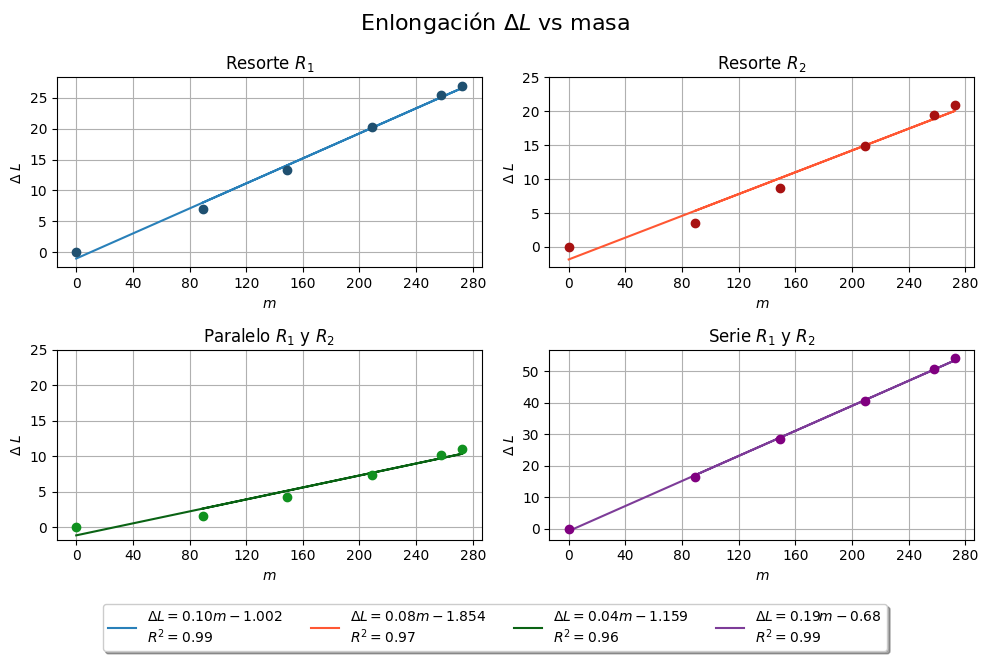

In [76]:
fig_1 = plt.figure(figsize=(10, 6))
fig_1.suptitle(r'Enlongación $\Delta$$L$ vs masa', fontsize=16)
spec = fig_1.add_gridspec(nrows=2, ncols=2, figure=fig_1)
ax1 = fig_1.add_subplot(spec[0, 0])
ax1.set_title(r'Resorte $R_1$')
ax1.plot(m, reg_r1,color='#2980b9', label=r'$\Delta L = 0.10m - 1.002$' + '\n' + r'$R^2 = 0.99$')
ax1.plot(m, delta_l_r1, 'o', color='#1f5070')
estilo(ax1)
ax2 = fig_1.add_subplot(spec[0, 1])
ax2.set_title(r'Resorte $R_2$')
ax2.plot(m, reg_r2,color='#ff5733', label=r'$\Delta L = 0.08m - 1.854$' + '\n' + r'$R^2 = 0.97$')
ax2.plot(m, delta_l_r2, 'o', color='#a81111')
estilo(ax2)
ax3 = fig_1.add_subplot(spec[1, 0])
ax3.set_title(r'Paralelo $R_1$ y $R_2$')
ax3.plot(m, reg_r1_r2_m1,color='#0a6314', label=r'$\Delta L = 0.04m - 1.159$' + '\n' + r'$R^2 = 0.96$')
ax3.plot(m, delta_l_r1_r2_m1, 'o', color='#10911f')
estilo(ax3)
ax4 = fig_1.add_subplot(spec[1, 1])
ax4.set_title(r'Serie $R_1$ y $R_2$')
ax4.plot(m, reg_r1_r2_m2,color='#7d3c98', label=r'$\Delta L = 0.19m - 0.68$' + '\n' + r'$R^2 = 0.99$')
ax4.plot(m, delta_l_r1_r2_m2, 'o', color='purple')
ax4.set_xlabel(r'$m$')
ax4.set_ylabel(r'$\Delta$ $L$')
ax4.set_xticks(np.arange(0, 300, 40))
ax4.set_yticks(np.arange(0, 60, 10))
ax4.grid(True)
fig_1.tight_layout()
fig_1.legend(loc='lower center',bbox_to_anchor=(0.5, -0.1), ncol=5,shadow=True, fancybox=True)
plt.savefig('resorte_grafica_1.png', dpi = 300, bbox_inches = 'tight')
fig_1.show()